In [ ]:
# Add parent directory to path for imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

In [1]:
from agricultural_csp.instance import *
from agricultural_csp.evaluator import *
from agricultural_csp.solver.agcsp_ts import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [2]:
from agricultural_csp.tools import display_grid_and_path

In [3]:
# Create a 50 x 50 square grid with five small square obstacles scattered on the grid
obstacle_half_size = 2  # Half-size of each small square obstacle

r_grid, c_grid = np.mgrid[0:50, 0:50]
grid_nodes = np.argwhere((r_grid >= 0) & (r_grid < 50) & (c_grid >= 0) & (c_grid < 50))

# Create five small square obstacles at different positions on the grid
obstacle_positions = [
    (10, 10),  # Top-left area
    (10, 40),  # Top-right area
    (25, 25),  # Center
    (40, 10),  # Bottom-left area
    (40, 40)   # Bottom-right area
]

obstacle_list = []
for obs_r, obs_c in obstacle_positions:
    obstacle = np.argwhere(
        (np.abs(r_grid - obs_r) <= obstacle_half_size) & 
        (np.abs(c_grid - obs_c) <= obstacle_half_size)
    )
    obstacle_list.append(obstacle)

# obstacle_nodes = np.vstack(obstacle_list)

instance = AgcspInstance(grid_nodes, np.array([]), 5, 90)
evaluator = AgcspEvaluator(instance)


Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1048 nós)


Coverage: 0/2500 nodes (0.0%)


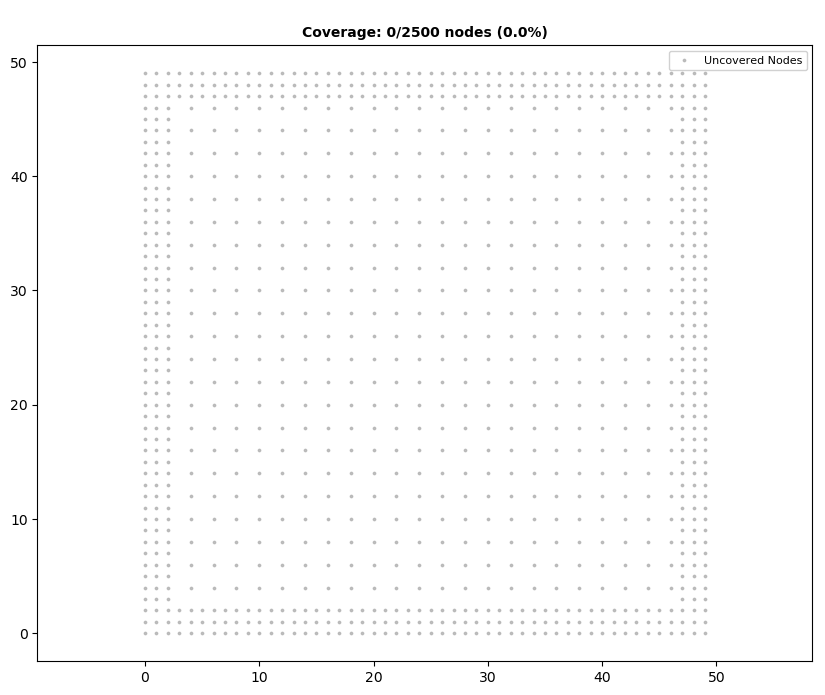

In [4]:
display_grid_and_path(inst=instance, evaluator=evaluator, path=[])

In [5]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.RANDOM,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[10, 1, 10], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3
)
term_criteria = TerminationCriteria(max_iterations=100)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=500,strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

In [6]:
solution = ts.solve()

--- Gerando nova solução inicial... ---
No valid uncovered nodes found. Trying covered nodes near uncovered areas...
No valid uncovered nodes found. Trying covered nodes near uncovered areas...
Could not find any valid node to add from 386 candidates.
-----------------------------------------------------------
Initial solution objective value: 1200.22
-----------------------------------------------------------
Iteration 0: Best ObjFun = 1200.22, Current ObjFun = 1200.22
Applying move: insert with args ((32, 8), 1)
Iteration 1: Best ObjFun = 1200.22, Current ObjFun = 1209.54
Applying move: insert with args ((30, 49), 4)
Iteration 2: Best ObjFun = 1200.22, Current ObjFun = 1205.77
Applying move: move with args (19, array([ 6, 12]))
Iteration 3: Best ObjFun = 1200.22, Current ObjFun = 1207.24
Applying move: insert with args ((46, 20), 9)
Iteration 4: Best ObjFun = 1200.22, Current ObjFun = 1202.26
Could not find any valid node to add from 386 candidates.
----------------------------------

KeyboardInterrupt: 

Coverage: 2436/2500 nodes (97.4%)


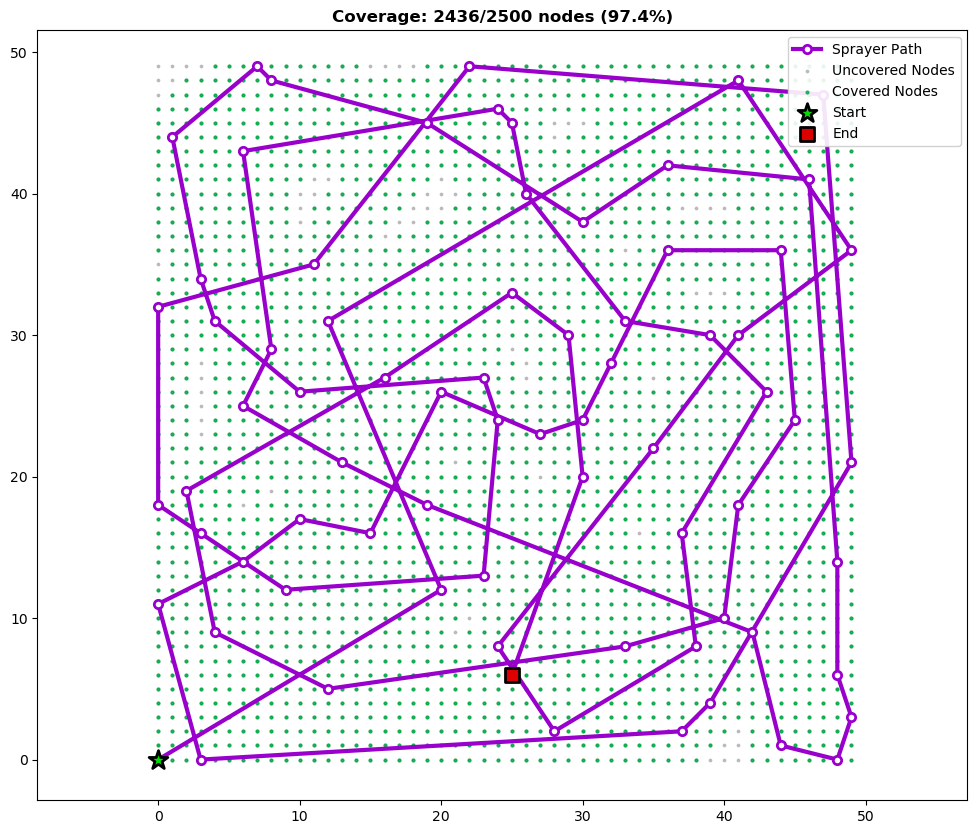

In [ ]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [ ]:
solution.cache["hits_obstacle"]

False